# Estadistica Aplicada G41
## Edwin Javier Hernandez Rodriguez
### 10ma Sesion 28feb 2023 / Actividad 5 17 marzo

In [43]:
import numpy as np 
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [44]:
#pip install lifelines;

In [85]:
alumnos = pd.read_excel('C:/Users/EHERNANDEZ/Downloads/supervivencia_examenes.xlsx')

In [7]:
alumnos

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,m
1,2,109,1,100.0,m
2,3,118,1,100.0,m
3,4,120,1,100.0,f
4,5,106,1,98.0,f
5,6,103,1,98.0,m
6,7,108,1,96.0,f
7,8,119,1,96.0,f
8,9,115,1,96.0,f
9,10,108,1,94.0,f


# a) Estadística descriptiva

In [8]:
prom_Ttodos = round(alumnos['tiempo'].mean(),2)
prom_Caltodos = round(alumnos['calificación'].mean(),2)

In [9]:
prom_Thom = round(alumnos[alumnos['género']=='m']['tiempo'].mean(),2)
prom_Calhom =  round(alumnos[alumnos['género']=='m']['calificación'].mean(),2)

In [10]:
prom_Tmuj = round(alumnos[alumnos['género']=='f']['tiempo'].mean(),2)
prom_Calmuj =  round(alumnos[alumnos['género']=='f']['calificación'].mean(),2)

In [11]:
print(f'El promedio del tiempo de entrega para hombres, mujeres y en general fue de: {prom_Ttodos, prom_Thom, prom_Tmuj} respectivamente.\n La calificación promedio para hombres, mujeres y en general fue de: {prom_Caltodos, prom_Calhom, prom_Calmuj} respectivamente')

El promedio del tiempo de entrega para hombres, mujeres y en general fue de: (107.35, 106.67, 108.12) respectivamente.
 La calificación promedio para hombres, mujeres y en general fue de: (90.71, 88.67, 93.0) respectivamente


# b)

A mayor tiempo, el riesgo de no entregar el examen aumenta, se ajustará un modelo de Weibull

In [12]:
from lifelines import WeibullFitter

In [13]:
weib1 = WeibullFitter().fit(alumnos['tiempo'], alumnos['examen'])

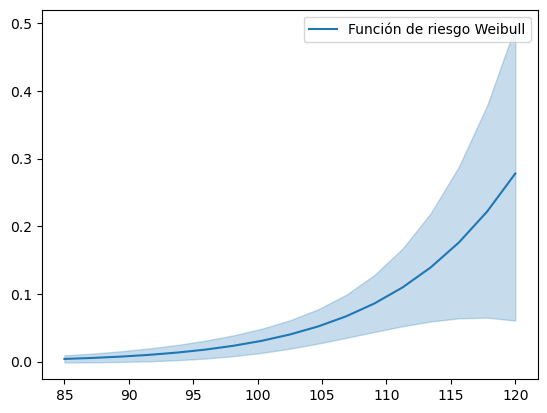

In [14]:
weib1.plot_hazard(label= 'Función de riesgo Weibull'); #funcion de riesgo
#conforme pasa el tiempo hay mas probabilidad de obtener calificación baja

# c) Modelo Weibull para hombres/mujeres

In [15]:
weib_hom = WeibullFitter().fit(alumnos[alumnos['género'] == 'm']['tiempo'], alumnos[alumnos['género'] == 'm']['examen'])
weib_muj = WeibullFitter().fit(alumnos[alumnos['género'] == 'f']['tiempo'], alumnos[alumnos['género'] == 'f']['examen'])


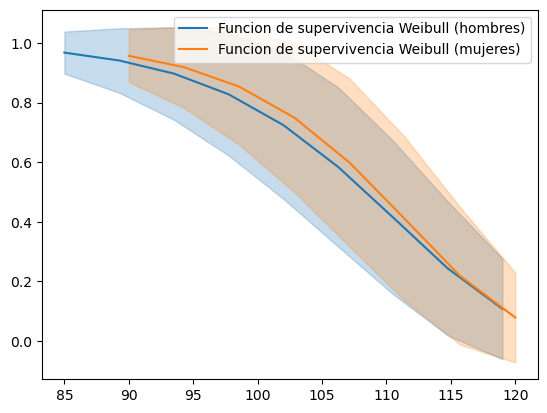

In [16]:
weib_hom.plot_survival_function(label= 'Funcion de supervivencia Weibull (hombres)').legend()
weib_muj.plot_survival_function(label= 'Funcion de supervivencia Weibull (mujeres)').legend()


Graficamente, las mujeres tardan mas tiempo en entregar el examen

# d) Kaplan-Meier

In [17]:
from lifelines import KaplanMeierFitter

In [18]:
kmf1 = KaplanMeierFitter().fit(alumnos['tiempo'], alumnos['examen'])

In [34]:
#kmf1.event_table

In [19]:
#Valores de la función de supervivencia
kmf1.survival_function_

,KM_estimate
timeline,
0.0,1.000000
85.0,0.941176
87.0,0.882353
90.0,0.823529
99.0,0.764706
103.0,0.705882
106.0,0.647059
108.0,0.529412
109.0,0.470588


In [20]:
#valores de los intervalos de confianza con 95% de confianza
kmf1.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
85.0,0.650179,0.991499
87.0,0.605979,0.969209
90.0,0.547132,0.939405
99.0,0.488278,0.904486
103.0,0.431478,0.865599
106.0,0.377147,0.823381
108.0,0.276168,0.730267
109.0,0.229598,0.679678
111.0,0.185759,0.626432


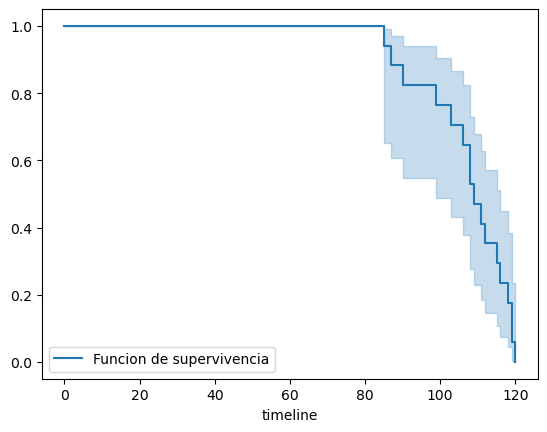

In [21]:
kmf1.plot_survival_function(label= 'Funcion de supervivencia');

# e) Kaplan-Meier hombres/mujeres

In [22]:
kmf_hom = KaplanMeierFitter().fit(alumnos[alumnos['género'] == 'm']['tiempo'], alumnos[alumnos['género'] == 'm']['examen'])
kmf_muj = KaplanMeierFitter().fit(alumnos[alumnos['género'] == 'f']['tiempo'], alumnos[alumnos['género'] == 'f']['examen'])


In [23]:
#valores de intervalos de confianza paa hombres
kmf_hom.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
85.0,0.432965,0.983564
87.0,0.364751,0.939296
103.0,0.281682,0.878307
109.0,0.204242,0.804525
111.0,0.135872,0.719315
112.0,0.078289,0.622627
116.0,0.033711,0.513068
118.0,0.006129,0.387665
119.0,0.000000,0.000000


In [40]:
#valores de intervalos de confianza paa mujeres
kmf_muj.confidence_interval_

,KM_estimate_lower_0.95,KM_estimate_upper_0.95
0.0,1.000000,1.000000
90.0,0.387000,0.981393
99.0,0.314807,0.930898
106.0,0.229333,0.860698
108.0,0.087006,0.674363
115.0,0.037067,0.558084
119.0,0.006593,0.422706
120.0,0.000000,0.000000


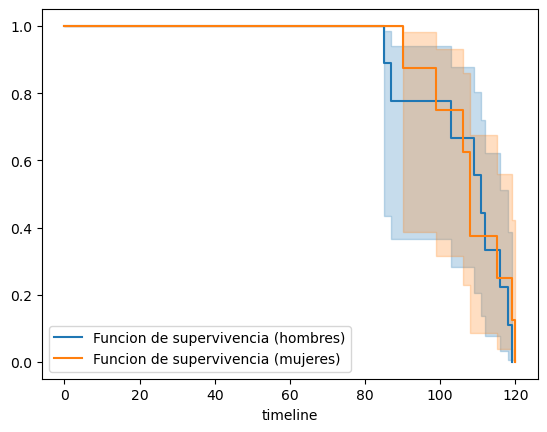

In [24]:
kmf_hom.plot_survival_function(label= 'Funcion de supervivencia (hombres)');
kmf_muj.plot_survival_function(label= 'Funcion de supervivencia (mujeres)');

Si es posible que las mujeres sean más rapidas al contestar el examen, sin embargo no se puede asegurar eso ya que según el gráfico anterior los intervalos de confianza se cruzan, lo que indica que las variables pueden ser iguales, es decir que puede que no haya un género que entregue el examen más rapido que el otro

# f) Log rank test

Log-Ranktest ~ X^2

$H0: S1(t) = S2(t) <- funciones supervivencia iguales

Ha: S1(t) !=  S2(t)$

In [25]:
from lifelines.statistics import logrank_test

In [29]:
hom = alumnos[alumnos['género'] == 'm']
muj = alumnos[alumnos['género'] == 'f']

In [30]:
lrt = logrank_test(muj['tiempo'], hom['tiempo'], muj['examen'], hom['examen'])
lrt.print_summary()

<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.15 0.69      0.53

In [31]:
lrt.p_value

0.6949237007861098

In [33]:
print(f'Con un p-value{lrt.p_value.round(2)}>0.05 No rechazamos H0 a un 95% de confianza, \nSignifica que las funciones de supervivencia son iguales \nLos hombres y las mujeres entregan al mismo tiempo el examen')

Con un p-value0.69>0.05 No rechazamos H0 a un 95% de confianza, 
Significa que las funciones de supervivencia son iguales 
Los hombres y las mujeres entregan al mismo tiempo el examen


# g) Modelo de Cox

Modelo de cox con genero y calificacion como variables explicativas, para explicar la funcion de riesgo de entregar el examen

In [56]:
from lifelines import CoxPHFitter

In [87]:
#alumnos['género'] = np.where(alumnos['género'] == 'm', '0','1')
#alumnos.drop(['género2'], axis=1)   "para eliminar columna, para eliminar filas es con axis=2"
#alumnos

#Solo se corre una vez, no correr de nuevo porque la columna género cambiaría

,id,tiempo,examen,calificación,género
0,1,85,1,100.0,0
1,2,109,1,100.0,0
2,3,118,1,100.0,0
3,4,120,1,100.0,1
4,5,106,1,98.0,1
5,6,103,1,98.0,0
6,7,108,1,96.0,1
7,8,119,1,96.0,1
8,9,115,1,96.0,1
9,10,108,1,94.0,1


In [88]:
cph = CoxPHFitter()
cph.fit(alumnos, 'tiempo', 'examen')
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 17 total observations, 0 right-censored observations>
             duration col = 'tiempo'
                event col = 'examen'
      baseline estimation = breslow
   number of observations = 17
number of events observed = 17
   partial log-likelihood = -33.31
         time fit was run = 2023-03-16 14:38:55 UTC

---
               coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                            
id             0.10       1.10       0.24            -0.36             0.56                 0.70                 1.75
calificación   0.06       1.06       0.13            -0.19             0.30                 0.83                 1.36
género        -0.50       0.60       0.80            -2.08             1.07                 0.13                 2.91

               cmp to     z    p   -log2(p)
covariate                                  
id               0.00  0.42 0.67       0.57
calificación     0.00  0.47 0.64       0.64
género           0.00 -0.63 0.53       0.92
---
Concordance = 0.51
Partial AIC = 72.61
log-likelihood ratio test = 0.40 on 3 df
-log2(p) of ll-ratio test = 0.09

# h) Interpretación

P < alpha

id no es significativa

calificación no es significativa

género no es significativa

- Por lo tanto ser hombre, mujer, haber estudiado o no, no afecta la probabilidad de entregar el examen



# i)

<AxesSubplot:xlabel='log(HR) (95% CI)'>

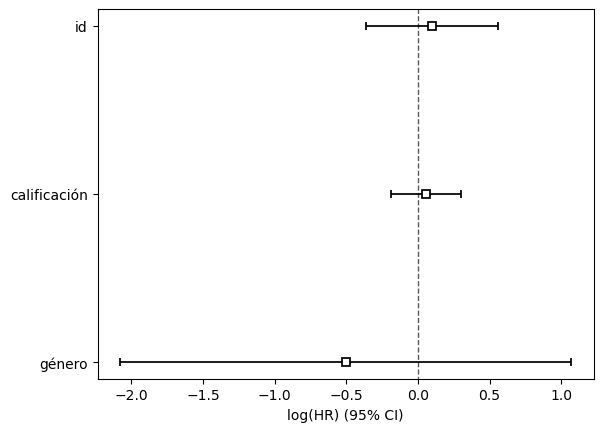

In [89]:
cph.plot()

<AxesSubplot:>

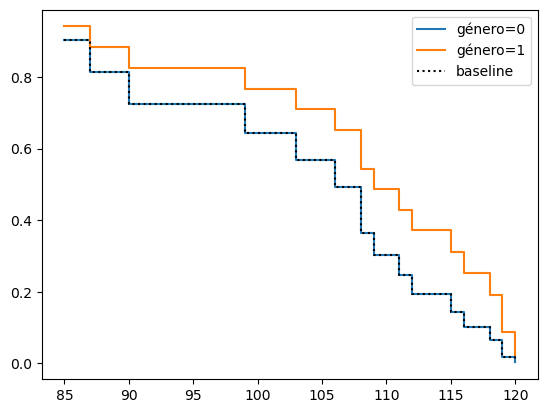

In [90]:
cph.plot_partial_effects_on_outcome(covariates='género',values=[0,1]) #todo esto suponiendo que fue signifiacativo
#0 es hombre, 1 es mujer

Las funciones de supervivencia si se parecen ya que en kaplan meier como aquí, han llegado a traslaparse y se repite que la función de supervivencia de las mujeres está por encima de la de los hombres

# j)

Dados los resultados del modelo de Cox, obtenemos que las variables NO son significativas, es decir que las funciones de supervivencia son iguales. Eso quiere decir que no se puede afirmar que las alumnas fueron más rapidas que los alumnos al entregar examen. A su vez como la calificación no es significativa con el tiempo, no es correcto señalar que los que entregaron el examen rapido es porque no estudiaron, ya que pueden haber contestado rapido porque sabían todo o por otra razón.